In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Titanic-Dataset.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Subset the Data frame

In [8]:
subset_df = df[['Name','Pclass','Sex','Age','Fare', 'Survived']]
subset_df = subset_df[subset_df['Pclass'] == 1]

mean = subset_df['Fare'].mean()
median = subset_df['Fare'].median()
max = subset_df['Fare'].max()
min = subset_df['Fare'].min

print(f"Mean: {mean}")
print(f"Median : {median}")
print(f"Max: {max}")
print(f"Min: {min}")



Mean: 84.1546875
Median : 60.287499999999994
Max: 512.3292
Min: <bound method Series.min of 1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64>


Handle Missing Value

In [10]:
null_count_age = subset_df['Age'].isnull().sum()
print(f"Missing Values in 'Age': {null_count_age}")

subset_df = subset_df.dropna(subset=['Age'])
print(f"Updated row: {len(subset_df)}")

Missing Values in 'Age': 30
Updated row: 186


One-hot Encoding

In [11]:
df_encoded = pd.get_dummies(df,columns=['Embarked'],prefix = 'Embarked', drop_first = False)
print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Compare Survival Rates by Gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-12-ca8ef1fcb68b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_survival.index, y=gender_survival.values,palette='viridis')


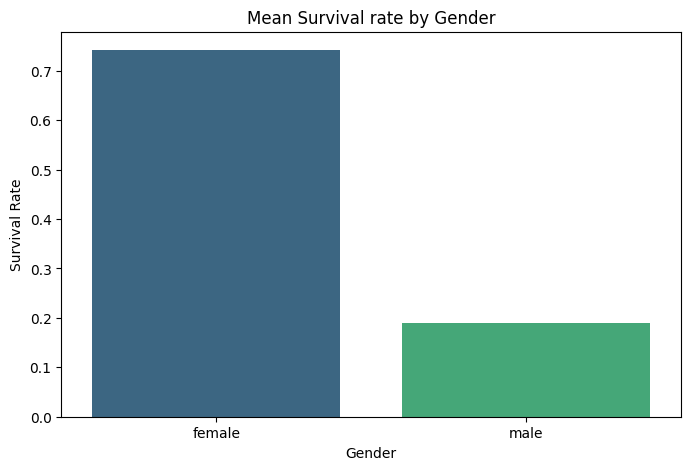

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_survival = df.groupby('Sex')['Survived'].mean()

print(gender_survival)

plt.figure(figsize=[8,5])
sns.barplot(x=gender_survival.index, y=gender_survival.values,palette='viridis')
plt.title('Mean Survival rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

Survival Rate by part of Embarkation

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


<ipython-input-14-1bad04ecd81d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=port_survival.index, y=port_survival.values,palette='coolwarm')


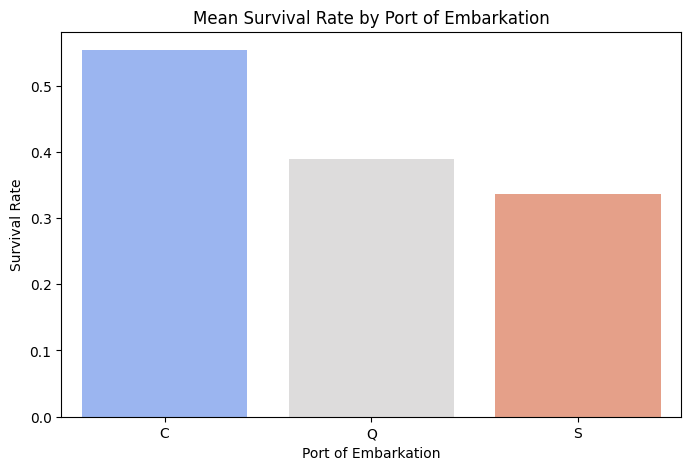

In [14]:
port_survival = df.groupby('Embarked')['Survived'].mean()

print(port_survival)

plt.figure(figsize=(8,5))
sns.barplot(x=port_survival.index, y=port_survival.values,palette='coolwarm')
plt.title('Mean Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation')
plt.show()

Survival Rates by age group and class

<ipython-input-15-d24fcffbbf04>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_survival = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()



Problem 6:
Mean Survival Rates by Age Group and Pclass:
Pclass                1         2         3
AgeGroup                                   
(0.419, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]   0.761905  0.400000  0.197674
(25.0, 31.8]   0.666667  0.416667  0.283582
(31.8, 41.0]   0.777778  0.461538  0.166667
(41.0, 80.0]   0.506667  0.363636  0.088235


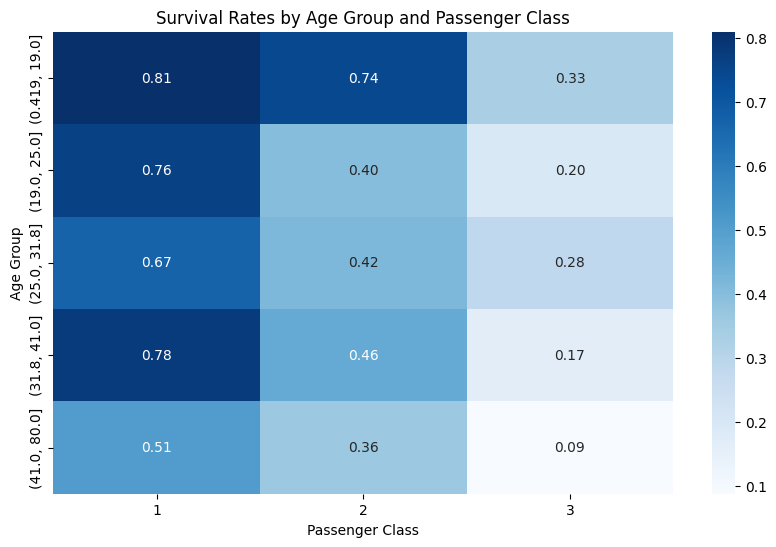

In [15]:
df['AgeGroup'] = pd.qcut(df['Age'], q=5)

age_class_survival = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()

print("\nProblem 6:")
print("Mean Survival Rates by Age Group and Pclass:")
print(age_class_survival)

plt.figure(figsize=(10, 6))
sns.heatmap(age_class_survival, annot=True, cmap='Blues', fmt='.2f')
plt.title('Survival Rates by Age Group and Passenger Class')
plt.ylabel('Age Group')
plt.xlabel('Passenger Class')
plt.show()
